<p style="text-align: center;"> <span style="color:firebrick"> <font size="5"> <b> USC Marshall School of Business </b> </font> </p> </span> 

<p style="text-align: center;"> <b> <font font size="5"> DSO 545- Homework 3 </p> </b></font>

<p style="text-align: center;"> <b> Fall 2020 </b> </p>


## <span style="color:blue">  Joyi Bhattacharjee </span>

## <span style="color:firebrick">  Assignment Learning Objectives </span>

- Read JSON data into `Python`
- Slice, aggregrate, and filter data using `pandas`
- Perform univariate, bivariate, and multivariate EDA


## <span style="color:firebrick"> Assignment Description </span>

### Bank Customer Churn

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers. Banks, telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. (https://en.wikipedia.org/wiki/Customer_attrition)

You work at a multinational bank that is aiming to increase it's market share in Europe. Recently, it has been noticed that the number of customers using the banking services has declined, and the bank is worried that existing customers have stopped using them as their main bank. As a data scientist, you are tasked with finding out the reasons behind customer churn and to predict customer churn. The marketing team, in particular, is interested in your findings and want to better understand what are the potential reasons that they are having this decline in their customers. Your results will help the marketing team to use their budget wisely to target potential churners.

## <span style="color:firebrick"> Dataset </span>

The dataset consists of 12 variables, and it is available on Kaggle.

**Source**: https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

    
|**Variables**    |**Explanation**|
|:-----------------|:--------------|
|`CustomerId`| customer's identification number
|`CredRate`| A credit score is a number between 300–850 that depicts a consumer's creditworthiness. The higher the score, the better a borrower looks to potential lenders.
|`Geography`| the regional bank has customers from three countries: France, Germany and Spain
|`Gender` | customer's gender
|`Age`| customer's age
|`Tenure`| years that the customer has stayed with the bank
|`Balance` | the amount of money available for withdrawal (\$)
|`Product Num`| number of products/services that the customers use in the bank
|`HasCrCard`| 1 indicates that the customer has a credit card, 0 otherwise
|`ActMem`| 1 indicates that the customer is an active member and using the bank's products and services and 0, otherwise
|`EstimatedSalary`| customer’s self-reported annual salary (\$)
|`Exited`| whether the customer has churned (closed the bank account), 1 indicates churn.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

mydata=pd.read_json('bank.json')
bank=mydata
mydata.head()
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CredRate         10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           9996 non-null   object 
 4   Age              9994 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   Prod Number      10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   ActMem           10000 non-null  int64  
 10  EstimatedSalary  9996 non-null   float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1015.6+ KB


## <span style="color:firebrick"> Questions </span>


### Technical Questions

#### 1. <span style="color:firebrick"> *(1 point)*  </span> What is the number of French, Spanish, and German customers in our dataset?

In [4]:
bank["Geography"].value_counts()

#France- 5014
#Germany- 2509
#Spain- 2477

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

#### 2. <span style="color:firebrick"> *(1 point)*  </span> What is the percentage of customers who churned?

In [5]:
round(bank["Exited"].value_counts(normalize=True)*100,2)

#20% of the customers churned

0    79.63
1    20.37
Name: Exited, dtype: float64

#### 3. <span style="color:firebrick"> *(1 point)*  </span> What is the percentage of customers who churned in the French branch? Round your answer to 2 decimal digits (search online on how to round values in Python)

In [6]:

round(bank.loc[bank['Geography']=="France"]['Exited'].value_counts(normalize=True)*100,2)
#16% of the customers churned from French

0    83.85
1    16.15
Name: Exited, dtype: float64

#### 4. <span style="color:firebrick"> *(1 point)*  </span> What is the average age of the bank customers in France? Round your answer to the nearest integer value. 

In [7]:
round(bank.loc[bank['Geography']=="France"]['Age'].mean(),0)

#The average age of the bank customers in France is 39

39.0

#### 5. <span style="color:firebrick"> *(1 point)*  </span> What is the average credit score for male Spanish customers who have been with the bank for 5 years or more? Round your answer to the nearest integer value. 

In [8]:
round(
    bank.loc[(bank['Geography'] == "Spain") & (bank['Gender'] == "Male") &
         (bank['Tenure'] >= 5)]['CredRate'].mean(), 0)

#The average credit score of the bank customers in Spain is 652

652.0

#### 6. <span style="color:firebrick"> *(1 point)*  </span> In machine learning, we usually split our dataset into testing and training data. We usually use the training dataset to train and build our predictive model, and we use the testing dataset to check the accuracy of our model.

- Use the first 8000 observations to create the `churn_training` dataset (excluding the `Exited` variable), and the remaining 2000 observations to be the testing data `churn_testing` (excluding the `Exited` variable). 


In [25]:
churn_training=bank.drop(columns='Exited')[0:8000]
churn_testing=bank.drop(columns='Exited')[8000:]
print(len(churn_training))
print(len(churn_testing))

8000
2000


### EDA Quesions

#### 7.  <span style="color:firebrick"> *(2 points)*  </span> Use boxplots to perform univariate EDA for all numerical variables in the dataset.




In [28]:
# List of Numerical columns in the data
colnames_numerics_only = bank.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only

['CustomerId',
 'CredRate',
 'Age',
 'Tenure',
 'Balance',
 'Prod Number',
 'HasCrCard',
 'ActMem',
 'EstimatedSalary',
 'Exited']

In [4]:
bank.drop(columns=['CustomerId']).describe().T

,count,mean,std,min,25%,50%,75%,max
CredRate,10000.0,650.528800,96.653299,350.00,584.0000,652.00,718.0000,850.00
Age,9994.0,38.925255,10.489248,18.00,32.0000,37.00,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.0000,5.00,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.0000,97198.54,127644.2400,250898.09
Prod Number,10000.0,1.530200,0.581654,1.00,1.0000,1.00,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.0000,1.00,1.0000,1.00
ActMem,10000.0,0.515100,0.499797,0.00,0.0000,1.00,1.0000,1.00
EstimatedSalary,9996.0,100074.744083,57515.774555,11.58,50974.0775,100168.24,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.0000,0.00,0.0000,1.00


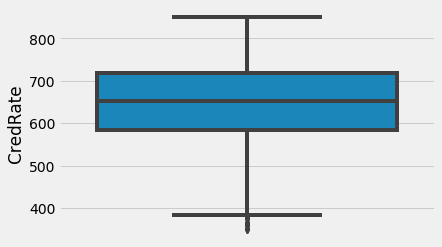

In [15]:
plt.style.use('fivethirtyeight')
# CredRate
sns.boxplot(y="CredRate", data=bank)

#    - Credit Rating ranges between 350 and 850.
#    - 50% of the customers have Credit Rating between 584 and 718.
#    - 25% of the customers have Credit Rating higher than 718.
#    - 25% of the customers have Credit Rating lower than 584.
#    - the median Credit Rating for customers is around 652
#    - the mean Credit Rating of customers equals the median Credit Rating indicating a symmetric distribution
#    - We can see customers with very low Credit Rating(<400).Might be due to marginal score bookings.

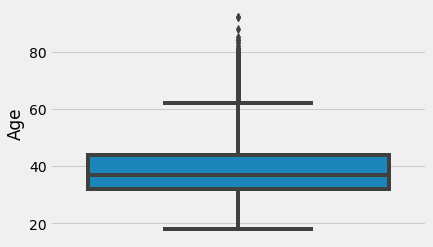

In [12]:
# Age
sns.boxplot(y="Age",data=bank)
# bank[bank["Age"].isna()==True]

#    - Age ranges between 18 and 92. 
#    - 50% of the customers ages between 32 and 44.
#    - 25% of the customers have ages higher than 44.
#    - 25% of the customers have ages lower than 32.
#    - the median age for customers is around 37
#    - the mean age of customers is 39 which is close to the median age indicating a symmetric distribution
#    - We can see there are customers who are even greater than 90 years of age
#    - There are 6 missing values in the Age variable

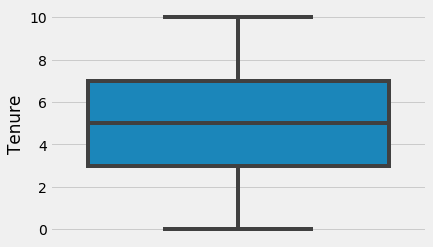

In [13]:
# Tenure
sns.boxplot(y="Tenure",data=bank)

#    - Tenure ranges between 0 and 10 years. 
#    - 50% of the customers have a tenure between 3 and 7.
#    - 25% of the customers have tenure higher than 7.
#    - 25% of the customers have tenure lower than 3.
#    - the median tenure for customers is 5
#    - the mean tenure of customers is equal to that of the median indicating a symmetric distribution
#    - There are no outliers in the Tenure variable


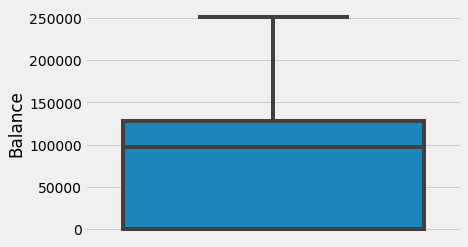

In [36]:
# Balance
sns.boxplot(y="Balance",data=bank)
#    - Balance ranges between 0 and 251K. 
#    - 50% of the customers have balance between 75K and 128K.
#    - 25% of the customers have balance higher than 128K.
#    - 25% of the customers have balance lower than 75K.
#    - the median balance for customers is 97K
#    - the mean balance of customers is 76K which is less than median indicating a left skewed distribution
#    - There are no outliers in the Balance variable

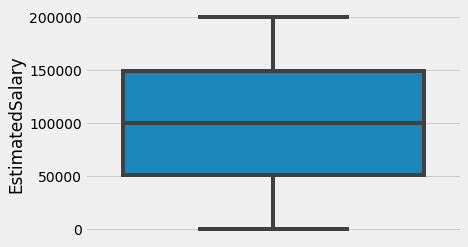

In [38]:
# Estimated Salary
sns.boxplot(y="EstimatedSalary",data=bank)

#   - Estimated Salary between 12 and 200K. 
#    - 50% of the customers earns between 51K and 149K.
#    - 25% of the customers earns higher than 149K.
#    - 25% of the customers earns lower than 51K.
#    - the median estimated salary for customers is around 100K.
#    - the mean estimated salary is equal to the median indicating a symmetric distribution.
#    - There were no outliers
 

#### 8. <span style="color:firebrick"> *(2 points)*  </span> Use count plots to perform univariate EDA for all categorical variables in the dataset.

In [ ]:
# List of Categorical columns in the data

    
Prod Number    
Geography
Gender
HasCrCard
ActMem
Exited

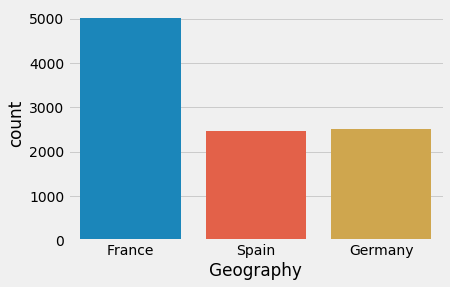

In [16]:
sns.countplot(x="Geography",data=bank)
# bank["Geography"].value_counts(normalize=True)

# About half of the customers are from the branch in France
# Both Germany and Spain have 25% of customers

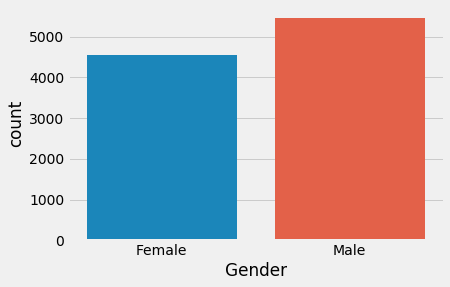

In [17]:
sns.countplot(x="Gender",data=bank)
# bank["Gender"].value_counts(normalize=True)

# More than half of the customers are Male

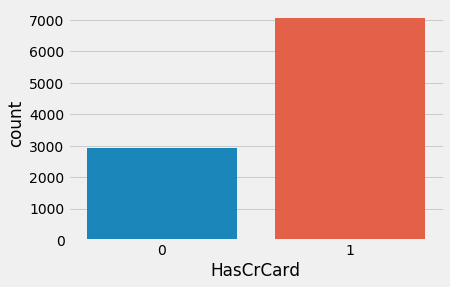

In [18]:
sns.countplot(x="HasCrCard",data=bank)
# bank["HasCrCard"].value_counts(normalize=True)

# 70% of the customers have Credit card

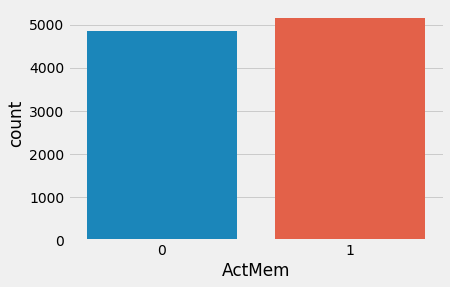

In [19]:
sns.countplot(x="ActMem",data=bank)
# bank["ActMem"].value_counts(normalize=True)

# More than half (52%) of the customers are Active members

0    0.7963
1    0.2037
Name: Exited, dtype: float64

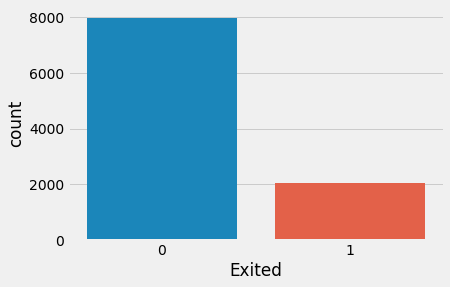

In [20]:
sns.countplot(x="Exited",data=bank)
# bank["Exited"].value_counts(normalize=True)

# 20% of the customers have closed their accounts and left the bank

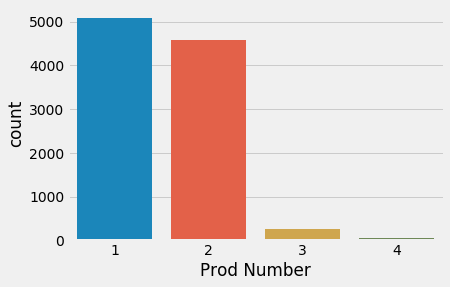

In [25]:
sns.countplot(x="Prod Number",data=bank)
# bank["Prod Number"].value_counts(normalize=True)

# About 50% of the customers hold only 1 product
# 46% of the customers hold 2 products
# 2.6% and 1% of customers hold 3 and 4 products respectively


#### 9. <span style="color:firebrick"> *(2 points)*  </span> Use bivariate visual EDA (boxplots) to see if there is any relationship between customer churn and all numerical variables.

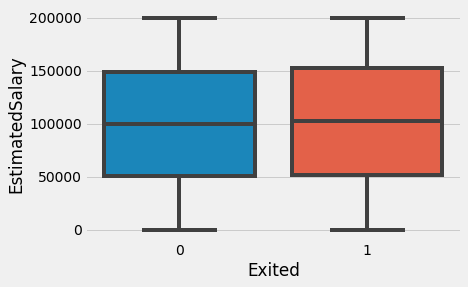

In [45]:
sns.boxplot(x="Exited",y="EstimatedSalary",data=bank)

# The distribution of estimated salary looks similar for both churned and non churned customers

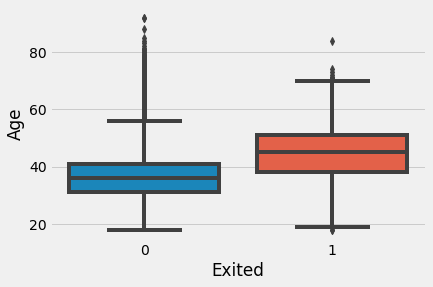

In [25]:
sns.boxplot(x="Exited",y="Age",data=bank)

# 50% of the churned customers have age between 38 to 51
# 50% of non churned customers are between 31 to 41 years old
# Also the median age of churned customers is 45 years which is quite higher than 
# that of non churned customers which is 36 years

# This shows customers with ages 40 or higher has greater chance to churn
# bank[bank["Exited"]==1]["Age"].describe()

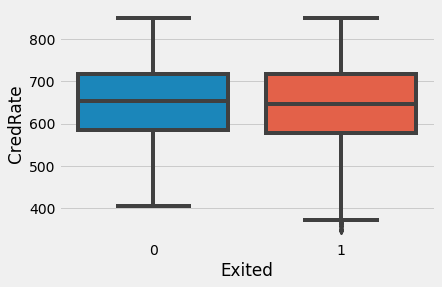

In [30]:
sns.boxplot(x="Exited",y="CredRate",data=bank)
# The distribution of Credit Rating looks almost similar for both churned and non churned customers
# There are few customers in churned group with very low Credit Rating.
# Those customers might churned out due to affordability issues

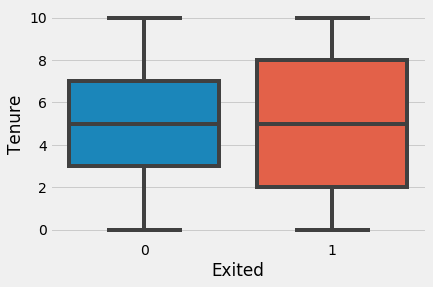

In [49]:
sns.boxplot(x="Exited",y="Tenure",data=bank)
# The distribution of Tenure looks similar for both churned and non churned customers

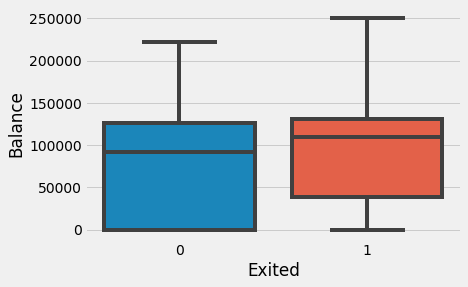

In [35]:
sns.boxplot(x="Exited",y="Balance",data=bank)
# 25% of the churned customers have balance 0-38K
# 25% of the non churned customers have 0 balance
# The median of the churned Cutomers (109K) is higher than that of non churned Customers(92K)

# This indicates churned Customers tend to build higher balances compared to that of non churned ones

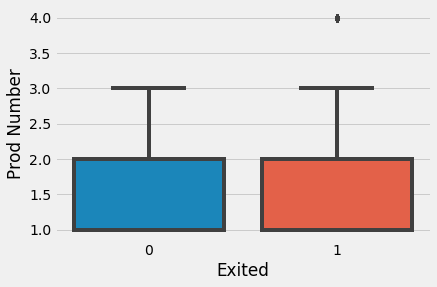

In [36]:
sns.boxplot(x="Exited",y="Prod Number",data=bank)
# The distribution of Prod Number looks almost similar for both churned and non churned customers

#### 10. <span style="color:firebrick"> *(2 points)*  </span> Use bivariate visual EDA (heatmaps) to see if there is any relationship between customer churn and all categorical variables.

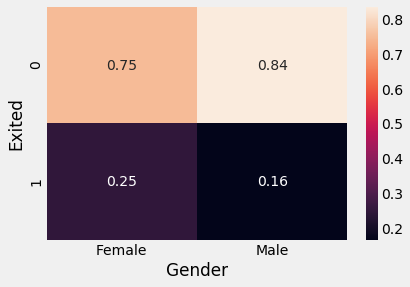

In [38]:
sns.heatmap(pd.crosstab(bank["Exited"],bank["Gender"],normalize='columns'),annot=True)

# 25% of the Female customers Churn vs 16% for Male Customers

# Female customers have higher Churn rate

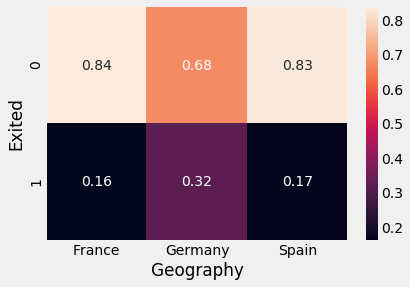

In [39]:
sns.heatmap(pd.crosstab(bank["Exited"],bank["Geography"],normalize='columns'),annot=True)

# By Geography Germany has the highest churn rate (32%) followed by Spain(17%) and France(16%)

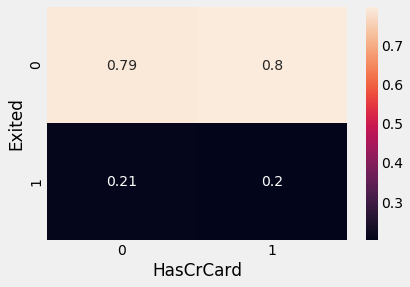

In [40]:
sns.heatmap(pd.crosstab(bank["Exited"],bank["HasCrCard"],normalize='columns'),annot=True)

# Whether a customer holds a credit card or not does not seem to have on churning rate

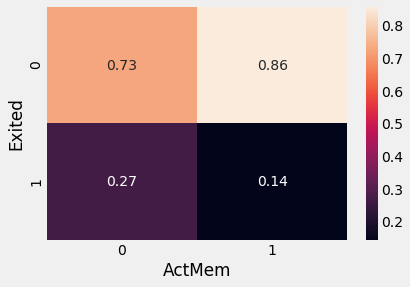

In [69]:
sns.heatmap(pd.crosstab(bank["Exited"],bank["ActMem"],normalize='columns'),annot=True)

# The Churn rate for inactive Customers (27%) is quite higher than that of active members(14%)
# This pattern might be because Customers tend to reduce active engagement 
# with the bank before closing the Account
# This can be used to target the inactive customers with different marketing strategies 
# to increase engagement

#### 11. <span style="color:firebrick"> *(1 point)*  </span> Use a facet grid plot to show the the relationship among any 3 variables in our dataset.

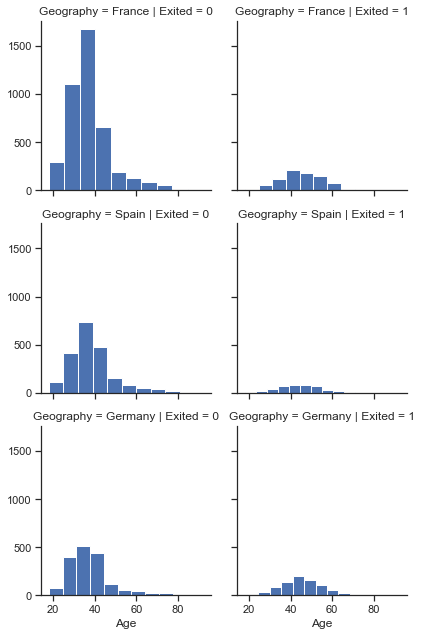

In [42]:
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(bank, col="Exited",  row="Geography")
g = g.map(plt.hist, "Age")

# For all the branches customers with age 40 or higher have higher tendency to churn
# The difference is most stark in case of the customers in France(From the Facet Grid plot)

## <span style="color:firebrick"> Grading & Expectations </span>


- The total number of points for this homework is 15 points
- Use this Jupyter Notebook as a template and add your answers to it
- Upload your answers back to blackboard
